In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stircom.csv')
df.head(5)  

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


In [3]:
df.dtypes.index

Index(['ID', 'town', 'country', 'age', 'job', 'married', 'education',
       'arrears', 'current_balance', 'housing', 'has_tv_package',
       'last_contact', 'conn_tr', 'last_contact_this_campaign_day',
       'last_contact_this_campaign_month', 'this_campaign',
       'days_since_last_contact_previous_campaign',
       'contacted_during_previous_campaign', 'outcome_previous_campaign',
       'new_contract_this_campaign'],
      dtype='object')

In [4]:
df.dtypes

ID                                             int64
town                                          object
country                                       object
age                                            int64
job                                           object
married                                       object
education                                     object
arrears                                       object
current_balance                              float64
housing                                       object
has_tv_package                                object
last_contact                                  object
conn_tr                                        int64
last_contact_this_campaign_day                 int64
last_contact_this_campaign_month              object
this_campaign                                  int64
days_since_last_contact_previous_campaign      int64
contacted_during_previous_campaign             int64
outcome_previous_campaign                     

In [5]:
df.info()  # checking the various columns and their respective datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50662 entries, 0 to 50661
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         50662 non-null  int64  
 1   town                                       50662 non-null  object 
 2   country                                    50662 non-null  object 
 3   age                                        50662 non-null  int64  
 4   job                                        50662 non-null  object 
 5   married                                    50662 non-null  object 
 6   education                                  50662 non-null  object 
 7   arrears                                    50662 non-null  object 
 8   current_balance                            50662 non-null  float64
 9   housing                                    50662 non-null  object 
 10  has_tv_package        

In [6]:
df.shape # checking the number of training examples and features (training instances, features)

(50662, 20)

## Goal : explore numerical values 

In [7]:
df.describe()

,ID,age,current_balance,conn_tr,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
count,5.066200e+04,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000
mean,5.502871e+07,40.979373,13.991210,3.005093,15.768525,2.713217,42.644408,0.640283
std,2.598596e+07,10.919324,30.899163,1.409003,8.347083,3.052227,102.238078,2.358029
min,1.000073e+07,18.000000,-80.190000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,3.249964e+07,32.000000,0.820000,2.000000,8.000000,1.000000,-1.000000,0.000000
50%,5.501127e+07,39.000000,4.720000,3.000000,16.000000,2.000000,-1.000000,0.000000
75%,7.748809e+07,48.000000,14.950000,4.000000,21.000000,3.000000,-1.000000,0.000000
max,9.999952e+07,95.000000,984.170000,5.000000,31.000000,63.000000,871.000000,275.000000


In [8]:
df.isnull().sum()  # checking the number of missing values with respect to each feature

ID                                           0
town                                         0
country                                      0
age                                          0
job                                          0
married                                      0
education                                    0
arrears                                      0
current_balance                              0
housing                                      0
has_tv_package                               0
last_contact                                 0
conn_tr                                      0
last_contact_this_campaign_day               0
last_contact_this_campaign_month             0
this_campaign                                0
days_since_last_contact_previous_campaign    0
contacted_during_previous_campaign           0
outcome_previous_campaign                    0
new_contract_this_campaign                   0
dtype: int64

In [9]:
[features for features in df.columns if df[features].isnull().sum() > 0]

[]

## This verifies that there are no missing values in any of the features

In [10]:
# cheching if there are any duplicates
df.duplicated().sum()

0

In [11]:
# checking for uniquesness of country
df.country.value_counts()

UK          50657
France          2
Germany         1
USA             1
Portugal        1
Name: country, dtype: int64

In [12]:
## checking the row index for countries that arent UK so that I can use the index to drop them
# df_country = df[df['country'] != "UK"]
# df_country.head()

In [13]:
# droping countries that arent UK
# df.drop([632, 658, 747, 1338, 6746], inplace=True)
# df.country.value_counts()

<AxesSubplot:>

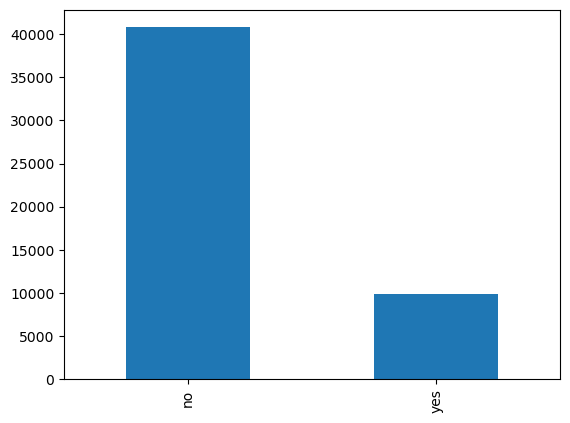

In [14]:
## visualizing class imbalance or balance
df.new_contract_this_campaign.value_counts().plot(kind='bar')

In [15]:
## counting the number of yes/no in our target( class count)
class_count = df['new_contract_this_campaign'].value_counts()
print(class_count)

no     40763
yes     9899
Name: new_contract_this_campaign, dtype: int64


In [16]:
## checking the percentage of each class
no_count = (df[['new_contract_this_campaign']]=='no').sum()
yes_count = (df[['new_contract_this_campaign']]=='yes').sum()
total_count = no_count + yes_count
print("Percentage of yes classes: %.2f%%" % ((yes_count/total_count) *100))
print("Percentage of no classes: %.2f%%" % ((no_count/total_count) *100))

Percentage of yes classes: 19.54%
Percentage of no classes: 80.46%


### It can be seen that the target value has more no than yes, this shows class imbalance and must be considered

In [17]:
## we can drop the following columns
## ID , country(because we only have one country(UK)), conn_tr(some kind of ID)
df_new = df.copy()
df_new.drop(['ID', 'country', 'conn_tr'], axis=1, inplace=True)
df_new.head()

,town,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,Bristol,39,management,married,tertiary,no,-1.90,no,yes,unknown,11,jun,8,-1,0,unknown,yes
1,Basildon,53,housemaid,married,primary,no,3.62,no,no,cellular,28,jul,2,-1,0,unknown,yes
2,Blackburn,79,retired,divorced,primary,no,27.87,no,no,telephone,13,jul,1,377,1,success,yes
3,Oldham,43,services,single,secondary,no,5.50,yes,no,cellular,13,may,2,-1,0,unknown,no
4,Middlesbrough,35,technician,single,secondary,no,3.44,no,no,cellular,27,aug,16,-1,0,unknown,yes


In [18]:
## Treating outliers set all values below the 25th percentile to 25th percentile
## and set all values above the 90th percentile
## separate numerical data from categorical data
df_num = df_new.filter(['age','current_balance','last_contact_this_campaign_day','this_campaign','days_since_last_contact_previous_campaign','contacted_during_previous_campaign'],axis=1).copy()
df_cat = df_new.filter(['town','job','married','education','arrears','housing','has_tv_package','last_contact','last_contact_this_campaign_month','outcome_previous_campaign'],axis=1).copy()
df_num = df_num.clip(lower=df_num.quantile(0.05), upper = df_num.quantile(0.90), axis=1)


In [19]:
df_cat.shape

(50662, 10)

In [20]:
df_num.describe()

,age,current_balance,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
count,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000
mean,40.456437,9.942657,15.662410,2.265584,30.173542,0.332083
std,9.477336,12.096474,8.025547,1.385914,65.894966,0.699339
min,26.000000,-1.490000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,0.820000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,4.720000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,14.950000,21.000000,3.000000,-1.000000,0.000000
max,56.000000,36.580000,28.000000,5.000000,187.000000,2.000000


In [21]:
## scaling numerical features with standardscaler

from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_num)
# creatin a pandas dataframe out of the scaled data
df_num = pd.DataFrame(data_scaled, columns=df_num.columns)
df_num.head()

,age,current_balance,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
0,-0.153677,-0.945132,-0.580952,1.973025,-0.473084,-0.474858
1,1.323546,-0.522691,1.537305,-0.191633,-0.473084,-0.474858
2,1.640094,1.482045,-0.331745,-0.913185,2.379969,0.955078
3,0.268386,-0.367272,-0.331745,-0.191633,-0.473084,-0.474858
4,-0.575741,-0.537572,1.412701,1.973025,-0.473084,-0.474858


# Pandas profiling

In [22]:
## from ydata_profiling import ProfileReport
## p_report = ProfileReport(df, title='Profile Report')
## p_report.to_file('report.html')  

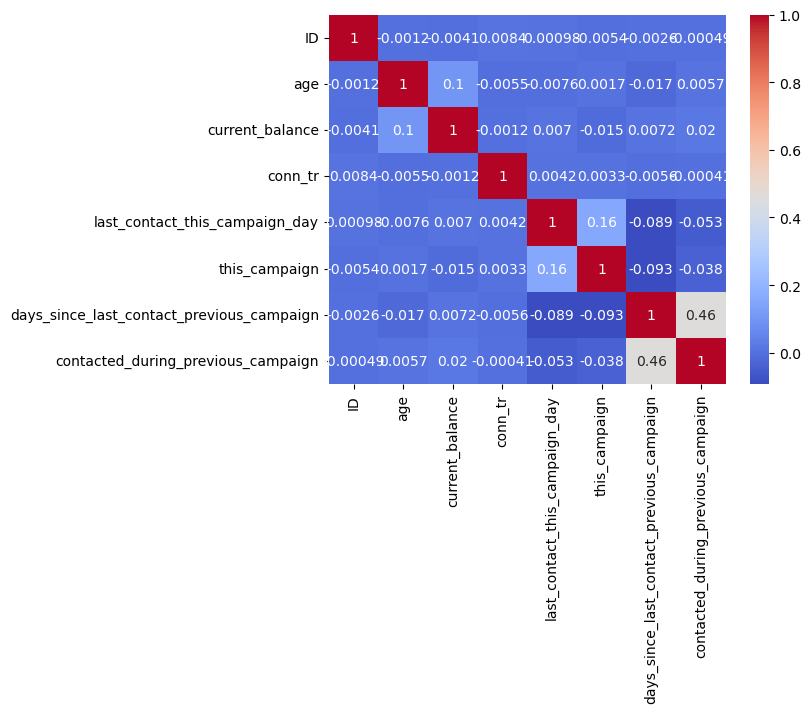

In [23]:
## checking correlation between varialbles and visualing it 
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()    ## why didn't it show negative correlation coefficient

### Dealing with categorical values, changing to numeric types

In [24]:
## changing all categorical data into numeric 
## using the label encoder
label_encoder = LabelEncoder()
for cols in df_cat.columns:
    df_cat[cols] = label_encoder.fit_transform(df_cat[cols])
df_cat.head()

,town,job,married,education,arrears,housing,has_tv_package,last_contact,last_contact_this_campaign_month,outcome_previous_campaign
0,15,4,1,2,0,0,2,3,7,3
1,2,3,1,0,0,0,1,1,6,3
2,9,5,0,0,0,0,1,2,6,2
3,62,7,2,1,0,1,1,1,9,3
4,54,9,2,1,0,0,1,1,1,3


In [25]:
df_cat.shape

(50662, 10)

In [26]:
df_num.shape

(50662, 6)

In [27]:
df_cat['has_tv_package'].unique()

array([2, 1, 0])

In [28]:
## join the num dataframe to categorical dataframe 
## separate the label/target
X = pd.concat([df_cat,df_num], join='outer', axis = 1)
y = df.filter(['new_contract_this_campaign'])
print(X.shape)
print(y.shape)
y.head()

(50662, 16)
(50662, 1)


,new_contract_this_campaign
0,yes
1,yes
2,yes
3,no
4,yes


In [29]:
# changing target to numerical type
y['new_contract_this_campaign'] = y['new_contract_this_campaign'].replace(['yes','no'], [1,0])
y.head()

,new_contract_this_campaign
0,1
1,1
2,1
3,0
4,1


In [30]:
## feature scaling
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,town,job,married,education,arrears,housing,has_tv_package,last_contact,last_contact_this_campaign_month,outcome_previous_campaign,age,current_balance,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
0,-1.141491,-0.113881,-0.28712,1.020059,-0.13203,-1.078857,2.348441,1.574527,0.220321,0.461409,-0.153677,-0.945132,-0.580952,1.973025,-0.473084,-0.474858
1,-1.606911,-0.420163,-0.28712,-1.655352,-0.13203,-1.078857,-0.425168,-0.688158,-0.070588,0.461409,1.323546,-0.522691,1.537305,-0.191633,-0.473084,-0.474858
2,-1.356300,0.192401,-1.91803,-1.655352,-0.13203,-1.078857,-0.425168,0.443185,-0.070588,-0.546694,1.640094,1.482045,-0.331745,-0.913185,2.379969,0.955078
3,0.541180,0.804965,1.34379,-0.317646,-0.13203,0.926907,-0.425168,-0.688158,0.802141,0.461409,0.268386,-0.367272,-0.331745,-0.191633,-0.473084,-0.474858
4,0.254768,1.417529,1.34379,-0.317646,-0.13203,-1.078857,-0.425168,-0.688158,-1.525137,0.461409,-0.575741,-0.537572,1.412701,1.973025,-0.473084,-0.474858


###   feature of importance selection methods

## Appying logistic regression to the data to make predictions

In [33]:
## split data into trian test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (35463, 16)
y_train (35463, 1)
X_test (15199, 16)
y_test (15199, 1)


In [35]:
## fit the trian data 
## perform prediction
logistic_regression = LogisticRegression() # creating a logisticRegression object
logistic_regression.fit(X_train,y_train)   # fitting the data
y_pred = logistic_regression.predict(X_test)  # make predictions with the test data

### Evaluation with confusion matrix

In [37]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat

array([[12011,   199],
       [ 2504,   485]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

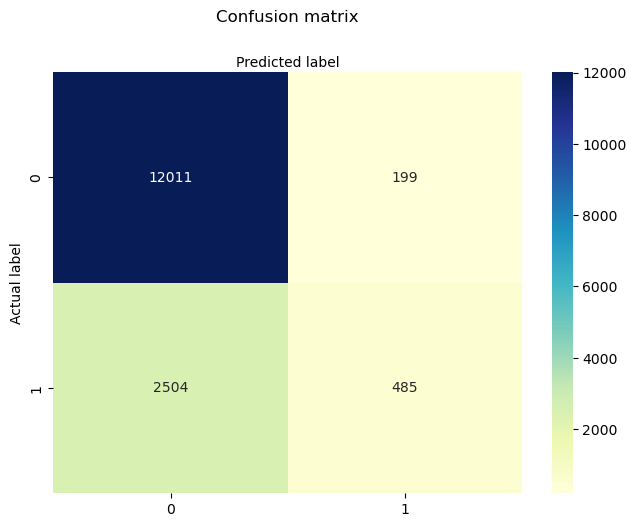

In [38]:
## visualize the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [39]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))

Accuracy 0.8221593525889861
Precision 0.7090643274853801
Recall 0.16226162596186017


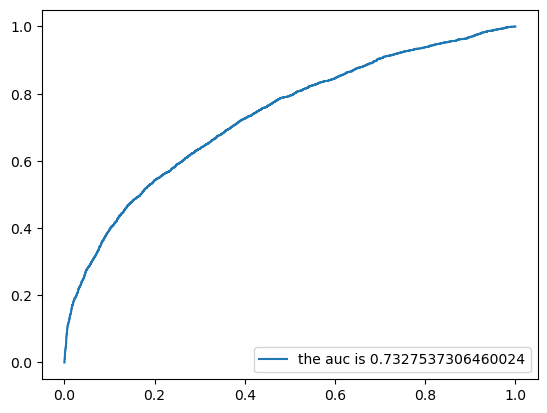

In [41]:
## ploting ROC curve
prob_y_pred = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred)  ## why the underscore?
auc = metrics.roc_auc_score(y_test, prob_y_pred)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

## Applying Random forest classifier to the data to make predictions

In [43]:
## create rf model object
## fit the model
rf_classifier = RandomForestClassifier(n_estimators=6, criterion='entropy', random_state=0) 
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=6, random_state=0)

In [44]:
## make predictions with X_test
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf 

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

## Evaluation with confusion matrix

In [48]:
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_mat_rf)

[[11840   370]
 [ 1697  1292]]


Text(0.5, 427.9555555555555, 'Predicted label')

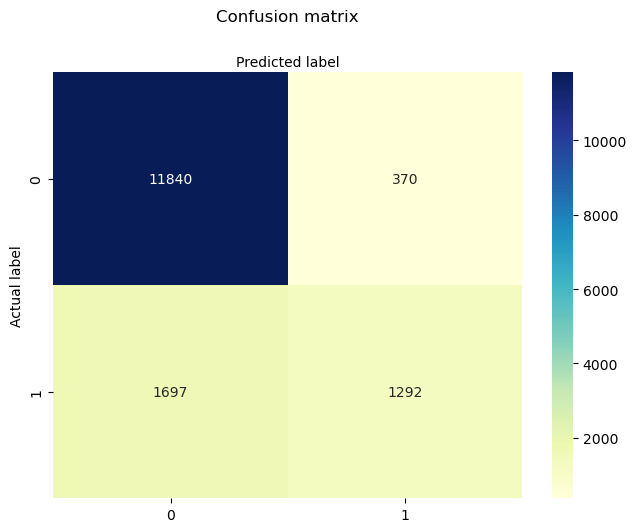

In [49]:
## visualizing the confusion matrix
## visualize the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_rf), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [50]:
## checking accuracy score
accuracy_score(y_test, y_pred_rf)

0.8640042108033423

In [51]:
## checking precision recall, and accuracy
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     12210
           1       0.78      0.43      0.56      2989

    accuracy                           0.86     15199
   macro avg       0.83      0.70      0.74     15199
weighted avg       0.86      0.86      0.85     15199



In [55]:
## ploting ROC curve
## ploting ROC curve
prob_y_pred = RandomForestClassifier.predict_proba(X_test)  ## why the ::
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred)  ## why the underscore?
auc = metrics.roc_auc_score(y_test, prob_y_pred)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()

TypeError: predict_proba() missing 1 required positional argument: 'X'